Using TensorFlow backend.


true label: 9,1.0; adv label: 3,0.9942805767059326


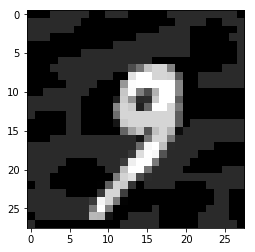

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import os
import sys

from config import DATA_PATH

import numpy as np
import matplotlib.pyplot as plt

from src.classifiers import cnn
from src.utils import load_mnist

%matplotlib inline

eps = 0.1
pic_index = 1000

(_, _), (X_test, Y_test) = load_mnist()

model = cnn.load_model(DATA_PATH + "/classifiers/mnist/cnn/relu/", "best-weights.h5")

advs = np.load(DATA_PATH + "/adversarial/mnist/cnn/relu/fgsm/eps%.2f.npy" % (eps))
y_pred = model.predict(advs)

true_max_conf, true_label = max(Y_test[pic_index,:]), np.argmax(Y_test[pic_index,:])
pred_max_conf, pred_label = max(y_pred[pic_index,:]), np.argmax(y_pred[pic_index,:])

print("true label: {}, {}; adv label: {}, {}".format(true_label, true_max_conf, pred_label, pred_max_conf))

pic_relu = advs[pic_index].reshape((28, 28))
plt.imshow(pic_relu, cmap="gray")

true label: 9,1.0; adv label: 9,0.9929674863815308


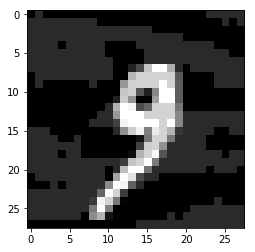

In [3]:
advs = np.load(DATA_PATH + "/adversarial/mnist/cnn/brelu/fgsm/eps%.2f.npy" % (eps))
y_pred = model.predict(advs)

true_max_conf, true_label = max(Y_test[pic_index, :]), np.argmax(Y_test[pic_index, :])
pred_max_conf, pred_label = max(y_pred[pic_index, :]), np.argmax(y_pred[pic_index, :])

print("true label: {}, {}; adv label: {}, {}".format(true_label, true_max_conf, pred_label, pred_max_conf))

pic_brelu = advs[pic_index].reshape((28, 28))
plt.imshow(pic_brelu, cmap="gray")